In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<h1> INTRUSION DETECTION </h1>

<h3>Data Exploration</h3>

In [2]:
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")

In [3]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [7]:
missing_columns = [col for col in train_df.columns if train_df[col].isnull().sum() > 0]
if len(missing_columns)==0 :
    print("No missing values")

No missing values


In [8]:
train_df.duplicated().sum()
#no duplicate values

np.int64(0)

In [9]:
from pandas.api.types import is_numeric_dtype

# for col in train_df:
#     if col != 'class' and is_numeric_dtype(train_df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = train_df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=train_df, x=train_df[col],y=train_df['class'], ax=ax[1])
#         plt.show()

## big output so commented it out 


<Axes: >

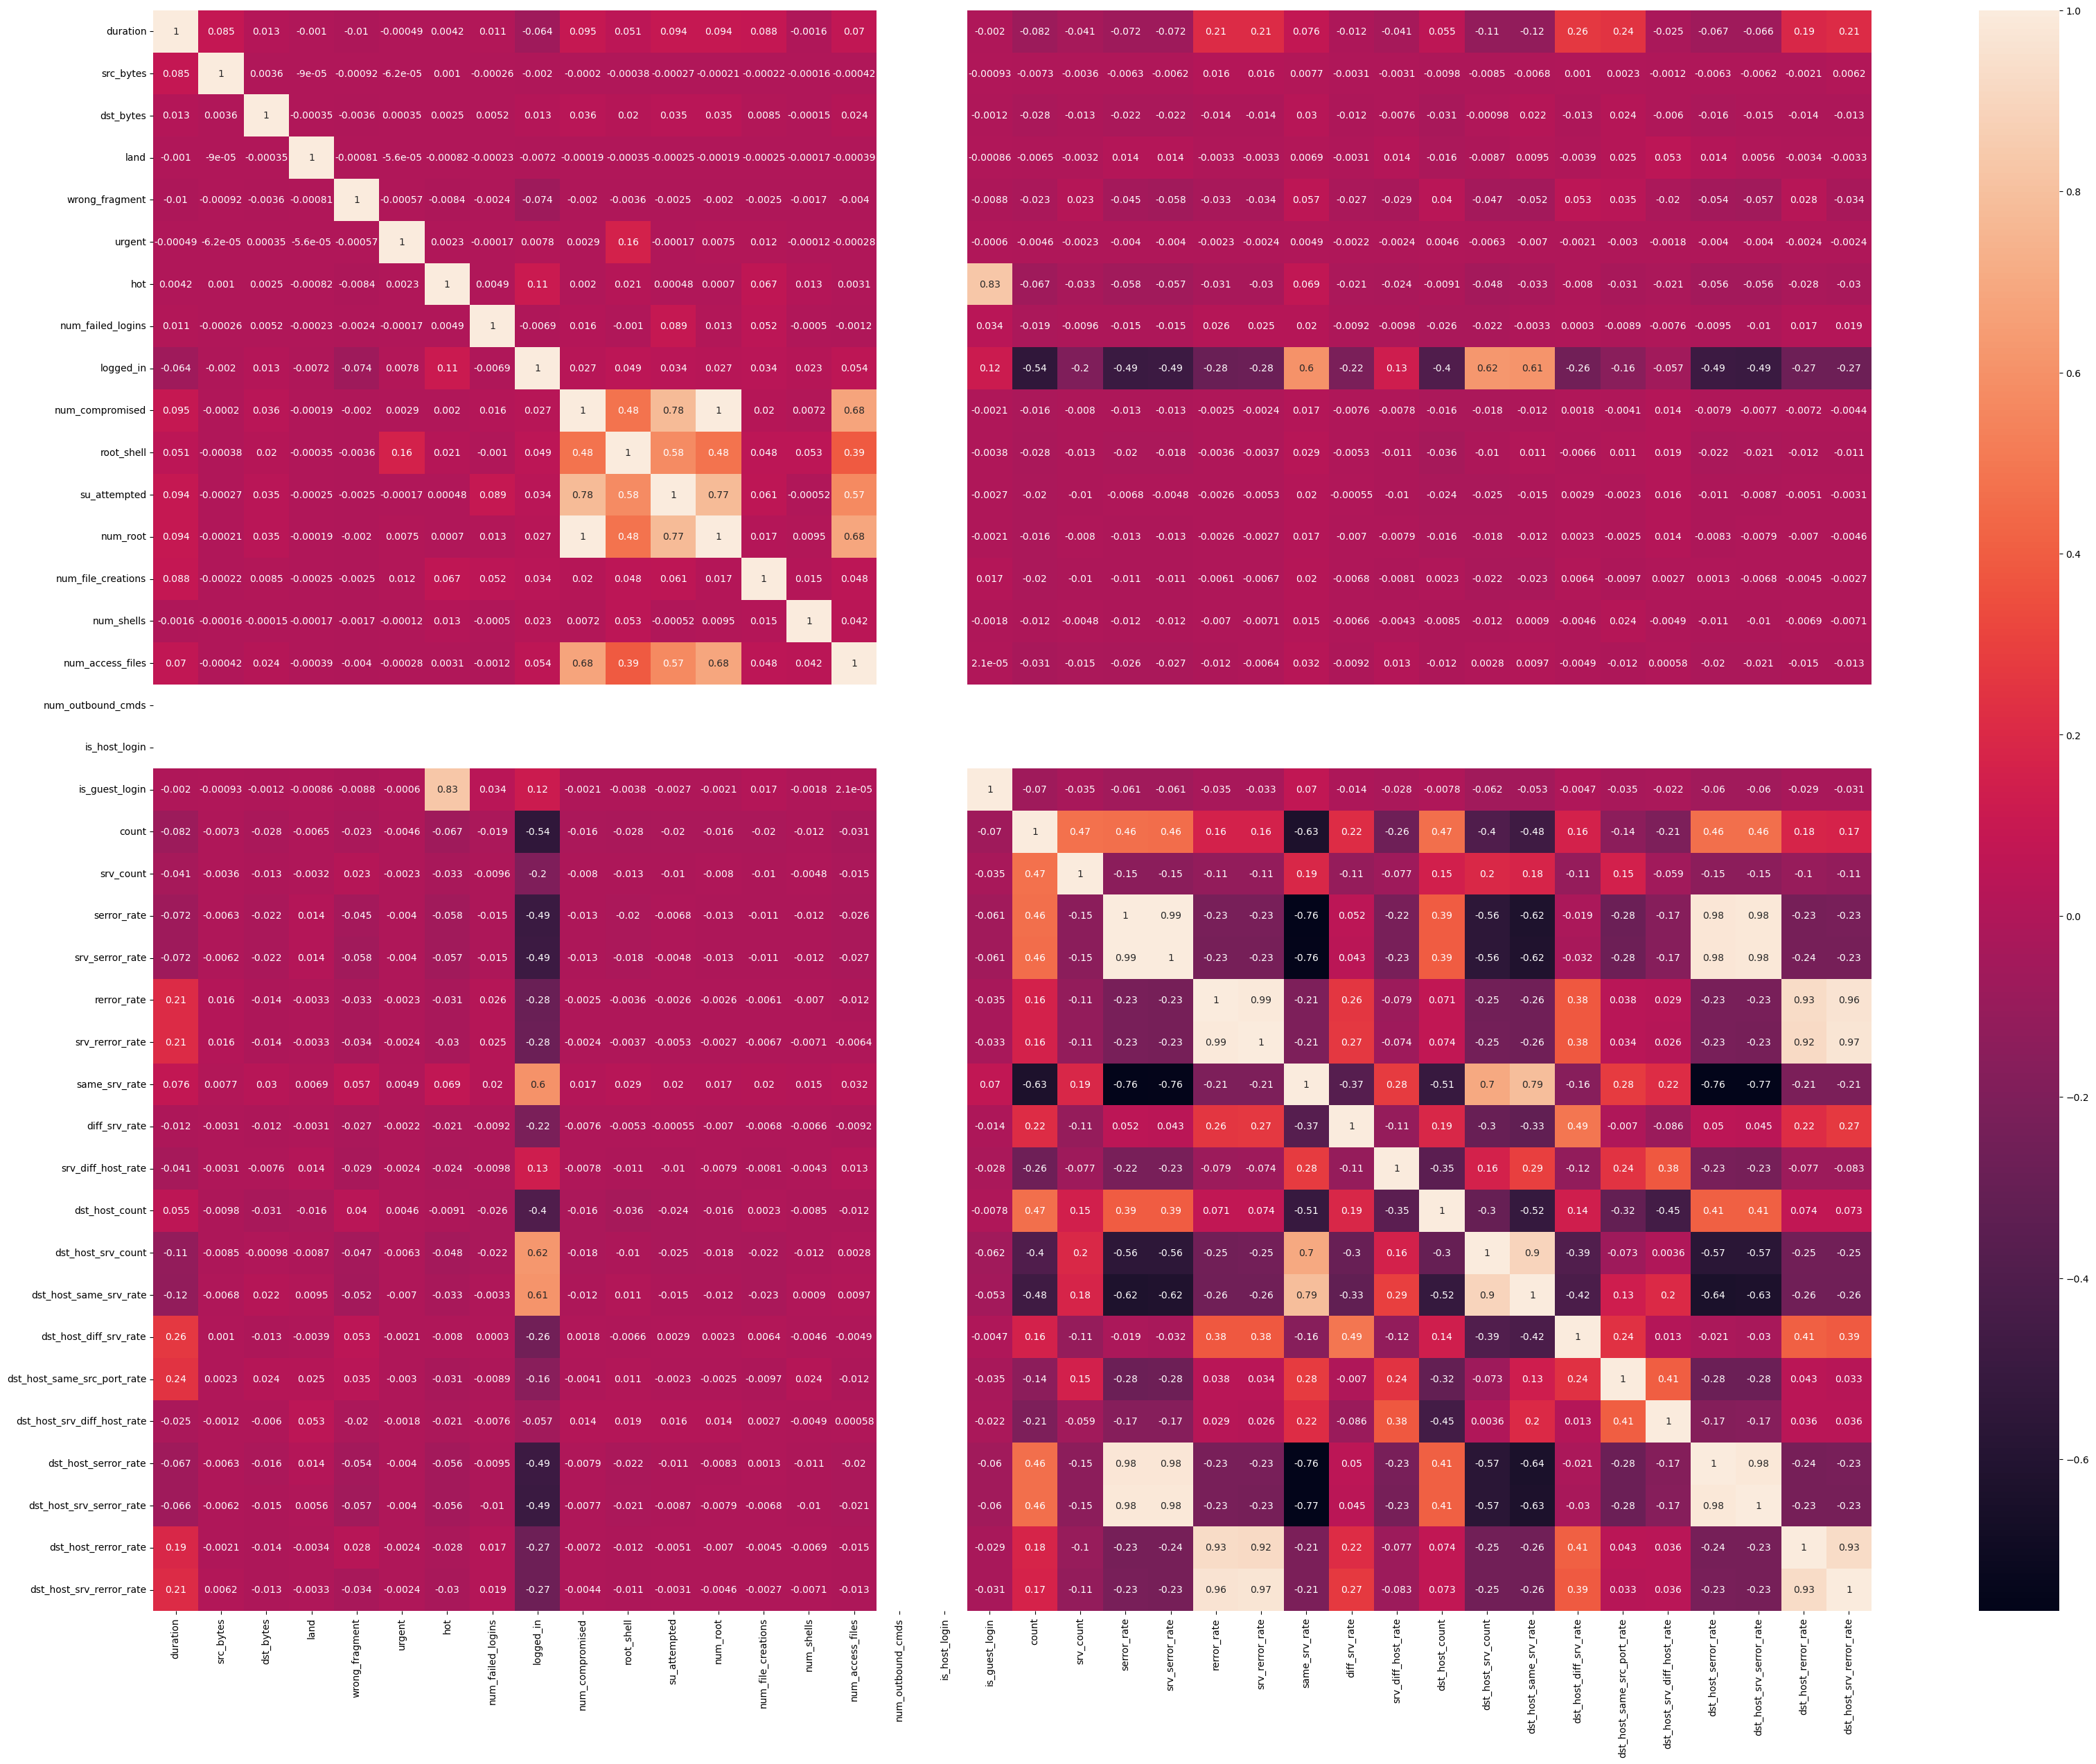

In [10]:
numeric_df = train_df.select_dtypes(include=['number'])
plt.figure(figsize=(40,30))
sns.heatmap(numeric_df.corr(),annot = True)
## num_outbound_cmds and is_host_legin give NAN as correlation Why??

<Axes: xlabel='class', ylabel='count'>

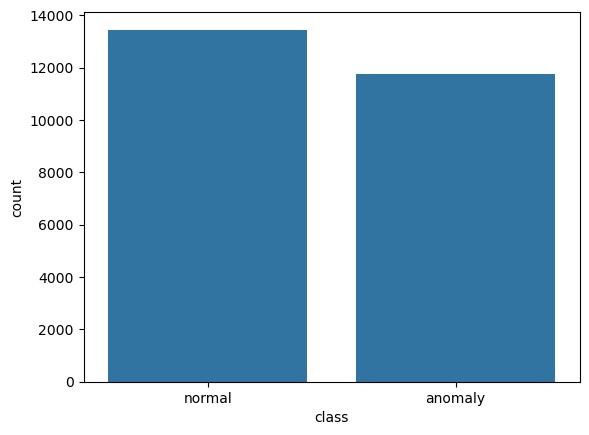

In [11]:
sns.countplot(x=train_df['class'])
## no need to generate synthetic points because the data is balanced

In [12]:
from sklearn.preprocessing import LabelEncoder
def encoded_cats(df) : 
    cat_var = []
    for col in df.columns : 
        if not is_numeric_dtype(df[col]) : 
            cat_var.append(col)
    print(cat_var)
    label_encoder = LabelEncoder()
    for x in cat_var : 
        df[x] = label_encoder.fit_transform(df[x])
## this function builds a list of categorical attributes and applies label encoding on ecach of them

In [13]:
encoded_cats(train_df)
encoded_cats(test_df)

['protocol_type', 'service', 'flag', 'class']
['protocol_type', 'service', 'flag']


In [14]:
train_df.isnull().sum()
## dataset checked for null values, none found

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
correlation_matrix = train_df.corr()
correlation_matrix


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.036421,0.101301,-0.066634,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,...,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,-0.050901
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.001286,-0.004734,-0.001123,0.176420,-0.000794,-0.011589,...,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182,0.283653
service,0.101301,0.025322,1.000000,-0.295491,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,...,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,-0.270494
flag,-0.066634,0.094926,-0.295491,1.000000,-0.006599,0.027606,-0.006593,0.068693,0.004744,0.067027,...,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075,0.651309
src_bytes,0.084864,-0.001286,0.008554,-0.006599,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,...,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.005743
dst_bytes,0.013258,-0.004734,-0.013782,0.027606,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,...,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,0.010949
land,-0.001012,-0.001123,-0.006896,-0.006593,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,...,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,-0.000605
wrong_fragment,-0.010358,0.176420,0.088169,0.068693,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,...,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,-0.097625
urgent,-0.000486,-0.000794,0.011325,0.004744,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,...,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358,-0.006743
hot,0.004202,-0.011589,-0.056165,0.067027,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,...,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719,0.012839


In [16]:
# plt.figure(figsize=(40,30))
# sns.heatmap(correlation_matrix,annot = True)

In [ ]:
train_df = train_df.loc[:, train_df.std() > 0]

In [18]:
# correlation_matrix = train_df.corr()
# correlation_matrix
# plt.figure(figsize=(40,30))
# sns.heatmap(correlation_matrix,annot = True)

In [ ]:
X_train = train_df.drop(['class'], axis=1)
Y_train = train_df['class']

<h1>Feature Selection</h1>

<h3> Mutual Information </h3>

In [20]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

mi = mutual_info_classif(
    X = X_train,
    y = Y_train,
    discrete_features = False, 
    n_neighbors=3,
    random_state=3,
)

mi


array([0.02967188, 0.04790137, 0.46614409, 0.36180002, 0.56404608,
       0.43765886, 0.        , 0.00420969, 0.        , 0.00751035,
       0.        , 0.2846599 , 0.00547023, 0.00074018, 0.0031511 ,
       0.00066685, 0.        , 0.        , 0.        , 0.00257326,
       0.26610832, 0.06625457, 0.27681025, 0.26196416, 0.03869479,
       0.03673707, 0.35435083, 0.35895505, 0.09407643, 0.13618512,
       0.32830445, 0.3083599 , 0.28537871, 0.14092149, 0.18885123,
       0.28232048, 0.27492126, 0.03571174, 0.05786881])

Text(0, 0.5, 'Mutual Information')

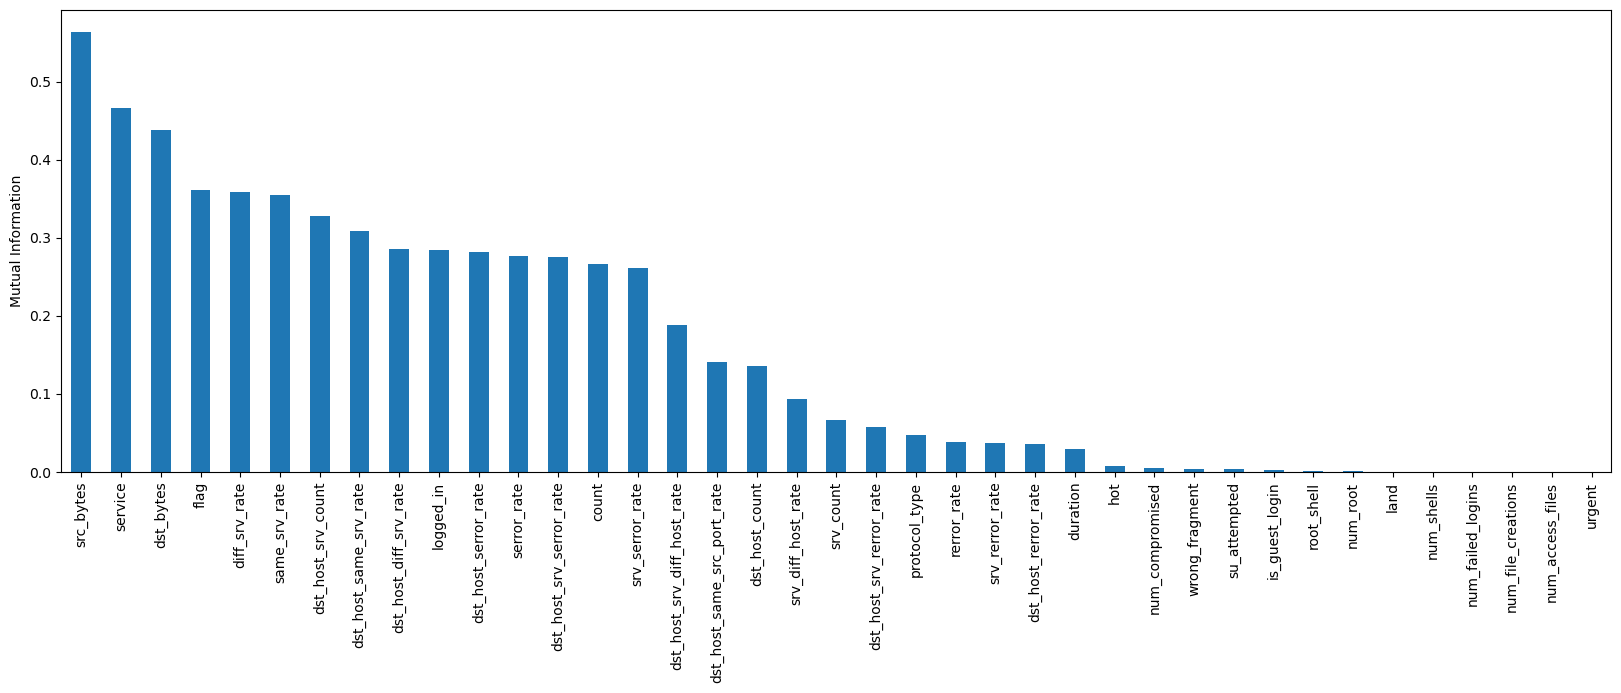

In [21]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [22]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, Y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate'],
      dtype='object')

In [23]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, Y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate'],
      dtype='object')

In [24]:
# to remove the rest of the features:
X_train = sel_.transform(X_train)

<h3>Splitting and Scaling Data</h3>

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test_df)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [27]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


<h3>KNN Classifier with Optuna </h3>

In [30]:
# Define the objective function
def objective(trial):
    # Suggest a value for n_neighbors
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    # Initialize and evaluate the model using cross-validation
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    accuracy = cross_val_score(classifier_obj, x_train, y_train, cv=5, scoring='accuracy').mean()
    return accuracy

In [31]:
# Create and run the Optuna study
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=10)

[I 2025-09-28 08:43:25,686] A new study created in memory with name: no-name-c7f9c478-32c0-4be5-93d6-247f60d83103
[I 2025-09-28 08:43:27,123] Trial 0 finished with value: 0.9798683874707086 and parameters: {'KNN_n_neighbors': 4}. Best is trial 0 with value: 0.9798683874707086.
[I 2025-09-28 08:43:28,831] Trial 1 finished with value: 0.9798683874707086 and parameters: {'KNN_n_neighbors': 4}. Best is trial 0 with value: 0.9798683874707086.
[I 2025-09-28 08:43:30,431] Trial 2 finished with value: 0.9777133887017918 and parameters: {'KNN_n_neighbors': 7}. Best is trial 0 with value: 0.9798683874707086.
[I 2025-09-28 08:43:31,988] Trial 3 finished with value: 0.9777133887017918 and parameters: {'KNN_n_neighbors': 7}. Best is trial 0 with value: 0.9798683874707086.
[I 2025-09-28 08:43:33,468] Trial 4 finished with value: 0.9821935185678072 and parameters: {'KNN_n_neighbors': 3}. Best is trial 4 with value: 0.9821935185678072.
[I 2025-09-28 08:43:35,033] Trial 5 finished with value: 0.9798683

In [32]:
# Display the best trial
print("Best trial:")
print(study_KNN.best_trial)

Best trial:
FrozenTrial(number=4, state=1, values=[0.9821935185678072], datetime_start=datetime.datetime(2025, 9, 28, 8, 43, 31, 989171), datetime_complete=datetime.datetime(2025, 9, 28, 8, 43, 33, 468683), params={'KNN_n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=4, value=None)


In [33]:
# Retrieve the best hyperparameter
best_n_neighbors = study_KNN.best_trial.params['KNN_n_neighbors']

In [34]:
# Train the final model with the best hyperparameter
KNN_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Evaluate the model
KNN_train_score = KNN_model.score(x_train, y_train)
KNN_test_score = KNN_model.score(x_test, y_test)

In [36]:
print(f"Train Score: {KNN_train_score}")
print(f"Test Score: {KNN_test_score}")

Train Score: 0.9913235794487921
Test Score: 0.9826673723207198


In [37]:
y_train_pred = KNN_model.predict(x_train)
y_test_pred = KNN_model.predict(x_test)


In [38]:
# Metrics for Training Set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Metrics for Test Set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Display metrics
print(f"Train Metrics:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1 Score:  {train_f1:.4f}")

print(f"Test Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")


Train Metrics:
  Accuracy:  0.9913
  Precision: 0.9913
  Recall:    0.9913
  F1 Score:  0.9913
Test Metrics:
  Accuracy:  0.9827
  Precision: 0.9827
  Recall:    0.9827
  F1 Score:  0.9827


<h3>SKLearn Gradient Boosting Model , Light Gradient Boost Model ,XG boost , AdaBoost Model</h3>

In [39]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [40]:
SKGB_train = SKGB.score(x_train , y_train)
SKGB_test = SKGB.score(x_test , y_test)

In [41]:
print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9950663490983328
Test Score: 0.9921937020375761


In [42]:
# Predictions
y_train_pred = SKGB.predict(x_train)
y_test_pred = SKGB.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))


Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8245
           1       0.99      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      0.99      1.00     17634
weighted avg       1.00      1.00      1.00     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [43]:
lgb_model = LGBMClassifier(random_state = 42)
lgb_model.fit(x_train , y_train)

[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


LGBMClassifier(random_state=42)

In [44]:
lgb_train = lgb_model.score(x_train , y_train)
lgb_test = lgb_model.score(x_test , y_test)
print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.9965599364911352


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [45]:
y_train_pred = lgb_model.predict(x_train)
y_test_pred = lgb_model.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8245
           1       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [46]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [47]:
xgb_train = xgb_model.score(x_train,y_train)
xgb_test = xgb_model.score(x_test, y_test)
print(f"xgb_train : {xgb_train}")
print(f"xgb_test : {xgb_test}")

xgb_train : 1.0
xgb_test : 0.9957660756813972


In [48]:
y_train_pred = xgb_model.predict(x_train)
y_test_pred =  xgb_model.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8245
           1       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [49]:
ab_model = AdaBoostClassifier(random_state=42)

In [50]:
ab_model.fit(x_train , y_train)

AdaBoostClassifier(random_state=42)

In [51]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.9686401270273336
Test Score: 0.9655993649113522


In [52]:
y_train_pred = ab_model.predict(x_train)
y_test_pred =  ab_model.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8245
           1       0.96      0.98      0.97      9389

    accuracy                           0.97     17634
   macro avg       0.97      0.97      0.97     17634
weighted avg       0.97      0.97      0.97     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3498
           1       0.96      0.97      0.97      4060

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



<h3>SVM Classifier</h3>

In [53]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('C', 0.1, 100.0, log=True)

    if kernel == 'linear':
        classifier_obj = SVC(kernel='linear', C=c).fit(x_train, y_train)
    elif kernel == 'rbf':
        gamma = trial.suggest_float('gamma', 1e-4, 1.0, log=True)
        classifier_obj = SVC(kernel='rbf', C=c, gamma=gamma).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        gamma = trial.suggest_float('gamma', 1e-4, 1.0, log=True)
        classifier_obj = SVC(kernel='poly', C=c, degree=degree, gamma=gamma).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c, max_iter=10000).fit(x_train, y_train)

    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy


In [54]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=10)  # Run for 50 trials


[I 2025-09-28 08:43:50,281] A new study created in memory with name: no-name-53bcf341-6c40-496f-a85a-5f94491b0362
[I 2025-09-28 08:44:02,701] Trial 0 finished with value: 0.5370468377877745 and parameters: {'kernel': 'poly', 'C': 33.53815755646078, 'degree': 7, 'gamma': 0.00024104997336869686}. Best is trial 0 with value: 0.5370468377877745.
[I 2025-09-28 08:44:12,703] Trial 1 finished with value: 0.8986504366234453 and parameters: {'kernel': 'rbf', 'C': 0.4633764973634086, 'gamma': 0.00016732521986537202}. Best is trial 1 with value: 0.8986504366234453.
[I 2025-09-28 08:45:49,552] Trial 2 finished with value: 0.9820058216459381 and parameters: {'kernel': 'poly', 'C': 16.61154737074954, 'degree': 4, 'gamma': 0.5646885280356344}. Best is trial 2 with value: 0.9820058216459381.
[I 2025-09-28 08:45:53,891] Trial 3 finished with value: 0.8840963217782483 and parameters: {'kernel': 'linear', 'C': 0.3002274062476065}. Best is trial 2 with value: 0.9820058216459381.
[I 2025-09-28 08:45:59,306

In [55]:

# Print the best trial
print("Best trial:")
print(f"  Value (Accuracy): {study.best_trial.value}")
print(f"  Params: {study.best_trial.params}")

Best trial:
  Value (Accuracy): 0.9820058216459381
  Params: {'kernel': 'poly', 'C': 16.61154737074954, 'degree': 4, 'gamma': 0.5646885280356344}


In [56]:

SVM_model = SVC(kernel = 'linear', C =  0.8052812485995922)
SVM_model.fit(x_train, y_train)

SVC(C=0.8052812485995922, kernel='linear')

In [57]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.882783259612113
Test Score: 0.8840963217782483


In [58]:
y_train_pred = SVM_model.predict(x_train)
y_test_pred =  SVM_model.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      8245
           1       0.84      0.96      0.90      9389

    accuracy                           0.88     17634
   macro avg       0.89      0.88      0.88     17634
weighted avg       0.89      0.88      0.88     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      3498
           1       0.85      0.95      0.90      4060

    accuracy                           0.88      7558
   macro avg       0.89      0.88      0.88      7558
weighted avg       0.89      0.88      0.88      7558



<h3>Decision Tree , Random Forest Classifier</h3>

In [59]:
def objective(trial):
    # Suggest hyperparameters to tune
    max_depth = trial.suggest_int('max_depth', 2, 32)  # Depth of the tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)  # Minimum samples required to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # Minimum samples in a leaf
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    # Create and fit Decision Tree model
    dt_model = DecisionTreeClassifier(
        max_features = dt_max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    dt_model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = dt_model.predict(x_test)

    # Calculate the evaluation metric (accuracy in this case)
    accuracy = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy').mean()
    return accuracy  # Objective is to maximize accuracy

In [60]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

[I 2025-09-28 08:46:47,125] A new study created in memory with name: no-name-765ac75d-c0de-4b77-89ab-4172cae4d4e5
[I 2025-09-28 08:46:47,299] Trial 0 finished with value: 0.9930814407807143 and parameters: {'max_depth': 25, 'min_samples_split': 23, 'min_samples_leaf': 1, 'dt_max_features': 7}. Best is trial 0 with value: 0.9930814407807143.
[I 2025-09-28 08:46:47,343] Trial 1 finished with value: 0.9208913300057364 and parameters: {'max_depth': 2, 'min_samples_split': 37, 'min_samples_leaf': 7, 'dt_max_features': 2}. Best is trial 0 with value: 0.9930814407807143.
[I 2025-09-28 08:46:47,485] Trial 2 finished with value: 0.9924577937862379 and parameters: {'max_depth': 9, 'min_samples_split': 30, 'min_samples_leaf': 6, 'dt_max_features': 7}. Best is trial 0 with value: 0.9930814407807143.
[I 2025-09-28 08:46:47,597] Trial 3 finished with value: 0.9906430435916047 and parameters: {'max_depth': 19, 'min_samples_split': 42, 'min_samples_leaf': 6, 'dt_max_features': 5}. Best is trial 0 with

FrozenTrial(number=25, state=1, values=[0.9942156455805398], datetime_start=datetime.datetime(2025, 9, 28, 8, 46, 51, 438966), datetime_complete=datetime.datetime(2025, 9, 28, 8, 46, 51, 674249), params={'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'dt_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=25, value=None)


In [61]:
# Print the best trial
print("Best trial:")
print(f"  Value (Accuracy): {study_dt.best_trial.value}")
print(f"  Params: {study_dt.best_trial.params}")

Best trial:
  Value (Accuracy): 0.9942156455805398
  Params: {'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'dt_max_features': 9}


In [62]:
best_params = study_dt.best_trial.params
print(best_params)

{'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 1, 'dt_max_features': 9}


In [63]:
dt_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=27, min_samples_split=7, random_state=42)

In [64]:
dt_train, dt_test = dt_model.score(x_train , y_train), dt_model.score(x_test , y_test)

print(f"Training Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Score: 0.9989792446410344
Test Score: 0.9947075946017465


In [65]:
def objective(trial) :
    rf_max_depth = trial.suggest_int('rf_max_depth' , 2 , 32 , log = False)
    rf_max_features = trial.suggest_int('rf_max_features' , 2, 10 , log = False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators' , 3 , 20, log = False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy').mean()
    return accuracy  # Objective is to maximize accuracy


In [66]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

[I 2025-09-28 08:46:52,703] A new study created in memory with name: no-name-2c97ba8f-1d9a-4b1c-ba12-bc7730429326
[I 2025-09-28 08:46:53,055] Trial 0 finished with value: 0.9946692728213968 and parameters: {'rf_max_depth': 30, 'rf_max_features': 2, 'rf_n_estimators': 12}. Best is trial 0 with value: 0.9946692728213968.
[I 2025-09-28 08:46:53,248] Trial 1 finished with value: 0.9946692728213968 and parameters: {'rf_max_depth': 17, 'rf_max_features': 5, 'rf_n_estimators': 3}. Best is trial 0 with value: 0.9946692728213968.
[I 2025-09-28 08:46:53,640] Trial 2 finished with value: 0.9946692728213968 and parameters: {'rf_max_depth': 15, 'rf_max_features': 7, 'rf_n_estimators': 16}. Best is trial 0 with value: 0.9946692728213968.
[I 2025-09-28 08:46:53,982] Trial 3 finished with value: 0.9946692728213968 and parameters: {'rf_max_depth': 24, 'rf_max_features': 8, 'rf_n_estimators': 9}. Best is trial 0 with value: 0.9946692728213968.
[I 2025-09-28 08:46:54,268] Trial 4 finished with value: 0.9

FrozenTrial(number=0, state=1, values=[0.9946692728213968], datetime_start=datetime.datetime(2025, 9, 28, 8, 46, 52, 704882), datetime_complete=datetime.datetime(2025, 9, 28, 8, 46, 53, 54286), params={'rf_max_depth': 30, 'rf_max_features': 2, 'rf_n_estimators': 12}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=0, value=None)


In [67]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], 
                            max_depth = study_rf.best_trial.params['rf_max_depth'], 
                            n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=30, max_features=2, n_estimators=12)

In [68]:
rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

In [69]:
print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9998865827378927
Test Score: 0.9952368351415718


In [70]:
y_train_pred = rf.predict(x_train)
y_test_pred =  rf.predict(x_test)

# Detailed metrics
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))

Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8245
           1       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [71]:
from sklearn.ensemble import VotingClassifier

v = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), 
                                     ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), 
                                     ("DecisionTree", dt_model), ("XGBoost", xgb_model), ("LightGB", lgb_model), 
                                     ("AdaBoost", ab_model)], voting = "hard")
v.fit(x_train,y_train)


[LightGBM] [Info] Number of positive: 9389, number of negative: 8245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532437 -> initscore=0.129932
[LightGBM] [Info] Start training from score 0.129932


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=No...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('LightGB', LGBMClassifier(random_state=42)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42))])

In [72]:
voting_train = v.score(x_train , y_train)
voting_test = v.score(x_test , y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [73]:
print(f"Training Score: {voting_train}")
print(f"Test Score: {voting_test}")

Training Score: 0.9999432913689463
Test Score: 0.9957660756813972


In [74]:
from tabulate import tabulate
data = [["KNN", KNN_train_score, KNN_test_score], 
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest Tree", rf_train , rf_test],
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["SVM", SVM_train, SVM_test],
        ["Voting Classifier" ,voting_train , voting_test]
       ]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════╤═══════════════╤══════════════╕
│ Model              │   Train Score │   Test Score │
╞════════════════════╪═══════════════╪══════════════╡
│ KNN                │      0.991324 │     0.982667 │
├────────────────────┼───────────────┼──────────────┤
│ Decision Tree      │      0.998979 │     0.994708 │
├────────────────────┼───────────────┼──────────────┤
│ Random Forest Tree │      0.999887 │     0.995237 │
├────────────────────┼───────────────┼──────────────┤
│ GBM                │      0.995066 │     0.992194 │
├────────────────────┼───────────────┼──────────────┤
│ XGBM               │      1        │     0.995766 │
├────────────────────┼───────────────┼──────────────┤
│ Adaboost           │      0.96864  │     0.965599 │
├────────────────────┼───────────────┼──────────────┤
│ light GBM          │      1        │     0.99656  │
├────────────────────┼───────────────┼──────────────┤
│ SVM                │      0.882783 │     0.884096 │
├────────────────────┼──────

In [75]:
import pickle

# Save the Voting Classifier model
with open("Intrusion_voting_classifier.pkl", "wb") as file:
    pickle.dump(v , file)

print("Model saved as 'Intrusion_voting_classifier.pkl'")


Model saved as 'Intrusion_voting_classifier.pkl'


In [76]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')